# Image Segmentation


1. Snakes algorithm
2. Watershed algorithm
3. K Means
4. Mean shift

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.filters import gaussian
from skimage.segmentation import active_contour

## 1. Snakes algorithm

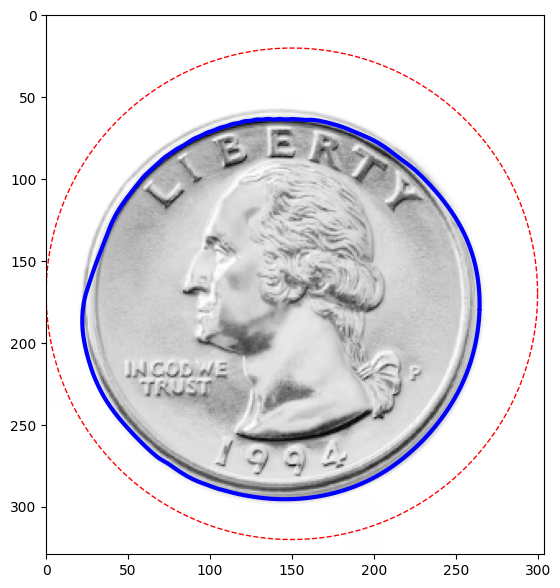

In [59]:
img = cv2.imread('coin.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

s = np.linspace(0, 2*np.pi, 400)
r = 170 + 150*np.sin(s)
c = 150 + 150*np.cos(s)
init = np.array([r, c]).T

gaussian_img = gaussian(img, 3, preserve_range=False)

snake = active_contour(gaussian_img,
                       init, alpha=0.015,
                       beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=1)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

## 2. Watershed algorithm

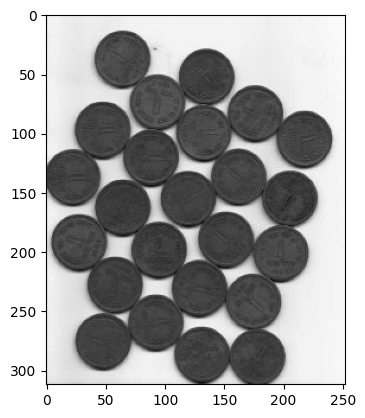

In [60]:
coins_img = cv2.imread('coins.jpg')
coins_img_gray = cv2.cvtColor(coins_img, cv2.COLOR_BGR2GRAY)
# fig, ax = plt.plot(figsize=(4, 3))
plt.imshow(coins_img_gray, cmap = 'gray')


(312, 252)


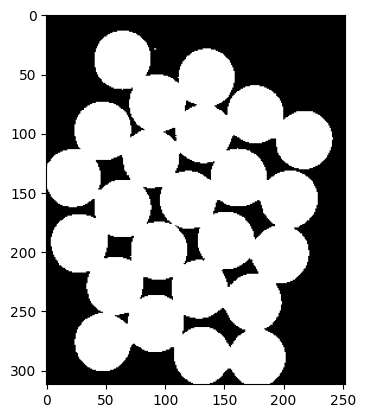

In [61]:
# def watershed_segment(gray_image):
#     """

#     Args:
#       image: is the image to segment the objects inside
#     """
ret, thresh = cv2.threshold(coins_img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap = 'gray')
print(thresh.shape)


In [62]:
kernel = np.ones((3, 3), np.uint8)
# sure background area
sure_bg = cv2.dilate(thresh, kernel, iterations=3)

In [63]:
# calculates the distance of each white pixel in the binary image to the closest black pixel
# Distance transform
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

In [64]:
#foreground area
ret, sure_fg = cv2.threshold(dist, 0.5 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype('uint8')

In [65]:
# unknown area
unknown = cv2.subtract(sure_bg, sure_fg)

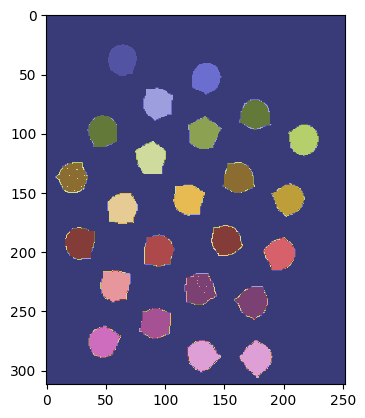

In [66]:
# sure foreground
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
plt.imshow(markers, cmap="tab20b")

In [67]:
from skimage.segmentation import watershed
# watershed Algorithm
watershed_img = cv2.watershed(coins_img, markers)
coins_img[markers == -1] = [255, 0, 0]
print(watershed_img.shape)

(312, 252)


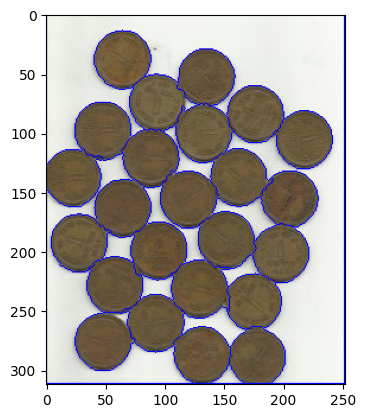

In [68]:
plt.imshow(cv2.cvtColor(coins_img, cv2.COLOR_BGR2RGB))

## 3. K means

In [78]:
def initialize_clusters(data, k):
    """
    Initialize clusters randomly from data points.
    """
    n_samples, _ = data.shape
    indices = np.random.choice(n_samples, k, replace=False)
    # print(indices)
    return data[indices]

In [85]:
def assign_clusters(data, clusters):
    """
    Assign each data point to the closest cluster centroid.
    """
    distances = np.linalg.norm(data[:, np.newaxis, :] - clusters, axis=2)
    # print(np.argmin(distances, axis=1))
    return np.argmin(distances, axis=1)

In [86]:
def update_clusters(data, assignments, k):
    """
    Update cluster centroids based on the mean of assigned data points.
    """
    new_clusters = np.zeros((k, data.shape[1]))
    for cluster_idx in range(k):
        cluster_data = data[assignments == cluster_idx]
        if len(cluster_data) > 0:
            new_clusters[cluster_idx] = np.mean(cluster_data, axis=0)
        else:
            # If no points assigned to the cluster, keep the centroid unchanged
            new_clusters[cluster_idx] = clusters[cluster_idx]
    return new_clusters

In [87]:
def kmeans(data, k, max_iters=100):
    """
    Perform K-means clustering on the given data.
    """
    # Initialize clusters
    clusters = initialize_clusters(data, k)

    # Iterate until convergence or max iterations
    for _ in range(max_iters):
        # Assign data points to the closest cluster centroid
        assignments = assign_clusters(data, clusters)

        # Update cluster centroids
        new_clusters = update_clusters(data, assignments, k)

        # Check for convergence
        if np.allclose(clusters, new_clusters):
            print("Converged.")
            break

        clusters = new_clusters

    return assignments, clusters

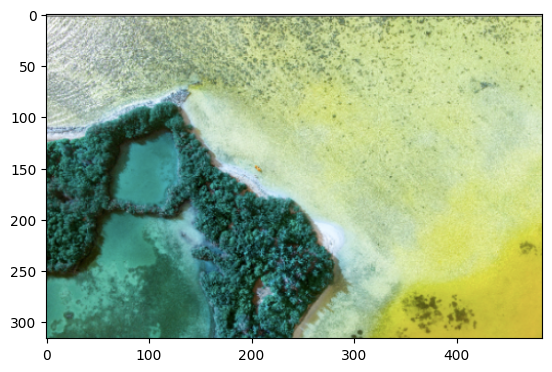

In [88]:
img = cv2.imread('forColorSeg.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [89]:
# Convert image to RGB (OpenCV reads image in BGR format)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape image data to 2D array
w, h, d = original_shape = tuple(image_rgb.shape)
image_2d = np.reshape(image_rgb, (w * h, d))

n_clusters = 3

# Maximum number of iterations
max_iters = 100

# Perform K-means clustering
assignments, clusters = kmeans(image_2d, n_clusters, max_iters)

# Assign each pixel to its corresponding cluster centroid
clustered_image = np.reshape(assignments, (w, h))

[131847 127552 111265]
[2 2 2 ... 0 0 0]
[2 2 2 ... 0 0 0]
[2 2 2 ... 0 0 0]
[2 2 2 ... 2 2 0]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
[2 2 2 ... 2 2 2]
Converged.


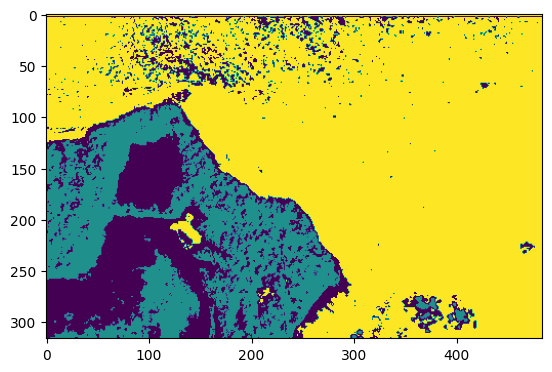

In [90]:
plt.imshow(clustered_image)

## 4. Mean shift

In [91]:
# Load the image using cv2
img = cv2.imread('forColorSeg.png')

# Convert the image from BGR to RGB
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels
original_shape = image.shape
image_2d = image.reshape(-1, 3)

# Estimate bandwidth for MeanShift
bandwidth = estimate_bandwidth(image_2d, quantile=0.2, n_samples=500)

# Apply MeanShift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(image_2d)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Reshape labels to the original image shape
labels_reshaped = labels.reshape(original_shape[0], original_shape[1])

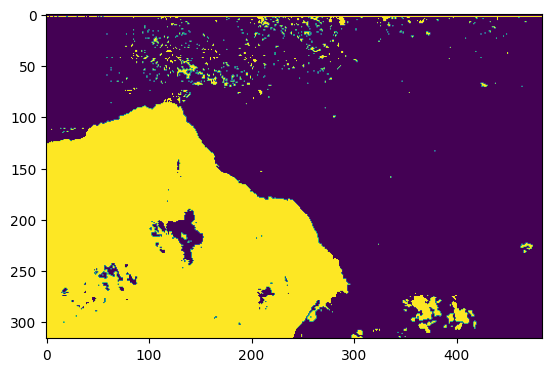

In [92]:
plt.imshow(labels_reshaped)